In [ ]:
import numpy as np

In [ ]:
x = np.array([0,1,2,3])
w = np.array([0, 0.1, 0.2, 0.3])
z = np.dot(x,w)
print(z)

In [ ]:
np.random.seed(0)
x = np.array(np.arange(4))
w = np.array(np.random.random(4))
z = np.dot(x,w)
print(z)

In [ ]:
np.random.seed(0)
x = np.array(np.arange(4)).reshape(4,1)
w = np.array(np.random.random(4)).reshape(4,1)
z = np.dot(x.T,w).squeeze()
print(z)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%run code/plot_xyw.py
%run code/perceptron.py

x = np.array([[1.0, 1.0], [2.0, -2.0], [-1.0, -1.5], [-2.0, -1.0], [-2.0,1.0], [1.5, -0.5]])

X = np.c_[ np.ones(len(x)), x ]
y = np.array([1, -1, -1, -1, 1, 1])
# w = np.random.random((X.shape[1],1))
w = np.array([0,1,0.5])
W = np.array([w])
epochs = 4
for _ in range(epochs):
    w = perceptron(X, y, w, eta=0.05, epochs=1)
    W = np.vstack([W, w])
plot_xyw(X,y,W,X0=True, annotate=True)

In [ ]:
%%writefile code/perceptron.py
import numpy as np
def perceptron(X, y, w=None, eta=0.1, epochs=5, random_seed=1):
    if w is None:
        np.random_seed(random_seed)
        w = np.random.random((X.shape[1],1))
    
    maxlabel, minlabel = y.max(), y.min()
    
    for _ in range(epochs):
        for xi, yi in zip(X, y):
            xi = xi.reshape(w.shape)
            z = np.dot(w.T, xi)
            yhat = np.where(z > 0.0, maxlabel, minlabel)
            delta = eta * (yi - yhat) * xi
            w += delta
    return w

In [ ]:
# 1 1 1          0 1 0.5             1      1     0.2     0 0 0
# 1 2 -2         0 1 0.5             1     -1     0.2    -0.4 -0.8 0.8
# 1 -1 -1.5      -0.4 0.2 1.3       -1     -1     0.2     0 0 0   
# 1 -2 -1        -0.4 0.2 1.3       -1     -1     0.2     0 0 0
# 1 -2 1         -0.4 0.2 1.3        1      1     0.2     0.4 -0.8 0.4
# 1 1.5 -0.5     -0.4 0.2 1.3       -1      1     0.2     0.4 0.6 -0.2


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%run code/plot_xyw.py

x = np.array([[1.0, 1.0], [2.0, -2.0], [-1.0, -1.5], [-2.0, -1.0], [-2.0,1.0], [1.5, -0.5]])

X = np.c_[ np.ones(len(x)), x ]

y = np.array([1, -1, -1, -1, 1, 1])

w = np.array([0, 0.8, 1.1])

plot_xyw(X, y, w, X0=True, annotate=True)

In [2]:
import numpy as np
def perceptronV2(X, y, w=None, eta=0.1, epochs=5, random_seed=1):
    if w is None:
        randnum = np.random.RandomState(random_seed)
        w = random.normal(loc=0, scale=0.01, size=X.shape[1])
    
    maxlabel, minlabel = y.max(), y.min()
    
    for _ in np.arange(epochs):
        for xi, yi in zip(X, y):
            z = np.dot(xi, w)
            yhat = np.where(z > 0.0, maxlabel, minlabel)
            if yhat != yi:
                delta = eta * (yi - yhat) * xi
                w += delta
    return w

[0.2 0.5 1. ]


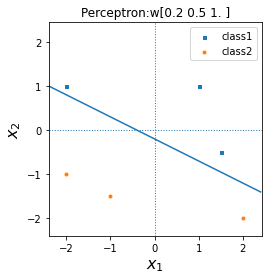

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%run code/plot_xyw.py

x = np.array([[1.0, 1.0], [2.0, -2.0], [-1.0, -1.5], [-2.0, -1.0], [-2.0,1.0], [1.5, -0.5]])

X = np.c_[ np.ones(len(x)), x ]
y = np.array([1, -1, -1, -1, 1, 1])
# w = np.random.random((X.shape[1],1))
w = np.array([0,1,0.5])
w = perceptronV2(X, y, w, eta=0.1, epochs=3)
print(np.round(w,2))
plot_xyw(X,y,w,X0=True)